<a href="https://colab.research.google.com/github/stevengiacalone/Python-workshop/blob/main/Session_3_Plotting_and_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

The first topic of today's session is plotting and visualization. We'll be using the popular package Matplotlib to explore a few different ways of plotting data. This tutorial is adapted from the official Matplotlib Pyplot tutorial, which can be found here: https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

Let's start by importing the package.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#### Plotting a line

We'll start with something simple and plot a straight line.

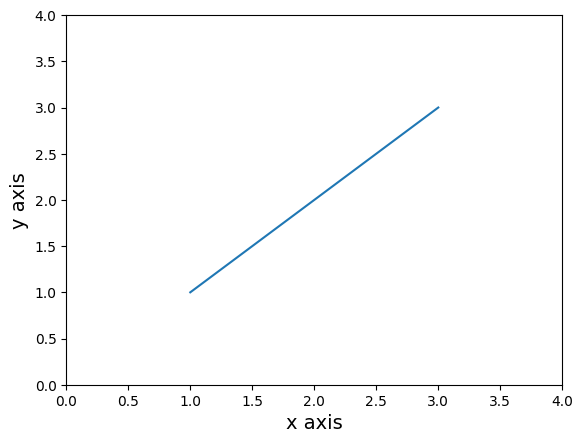

In [41]:
# first, we need some data to plot
x_data = np.array([1,2,3])
y_data = np.array([1,2,3])

# this function adds the data to the plot
plt.plot(x_data, y_data)

# these functions define the axis labels - you can make them anything
plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

# these functions define the x and y limits of the plot
# if omitted, matplotlib will automatically set the limits
plt.xlim([0,4])
plt.ylim([0,4])

# this function will tell Python to display the plot
plt.show()

We can edit the format of the line using a number of keywords in the .plot() function. This is especially useful when you have multiple lines on the same plot and want to distinguish them.

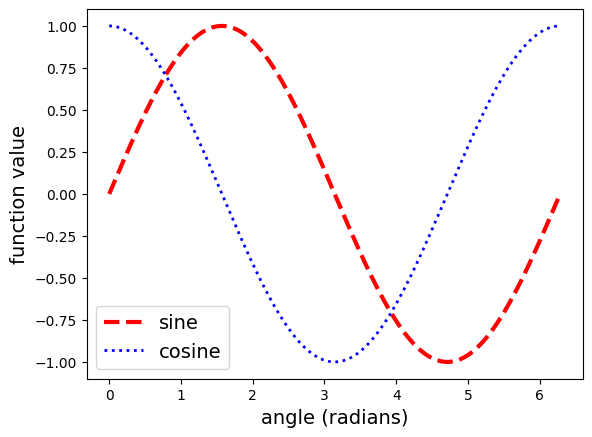

In [17]:
x_data = np.linspace(0, 2*np.pi, 1000)
y_data_sin = np.sin(x_data)
y_data_cos = np.cos(x_data)

plt.plot(x_data, y_data_sin, color="red", linestyle="--", linewidth=3, label="sine")
plt.plot(x_data, y_data_cos, color="blue", linestyle=":", linewidth=2, label="cosine")

plt.xlabel("angle (radians)", fontsize=14)
plt.ylabel("function value", fontsize=14)

# the legend function adds the labels defined above to the plot
plt.legend(loc="lower left", fontsize=14)

plt.show()

#### Plotting a scatterplot

You can also plot a scatter plot using the .scatter() function instead of the .plot() function.

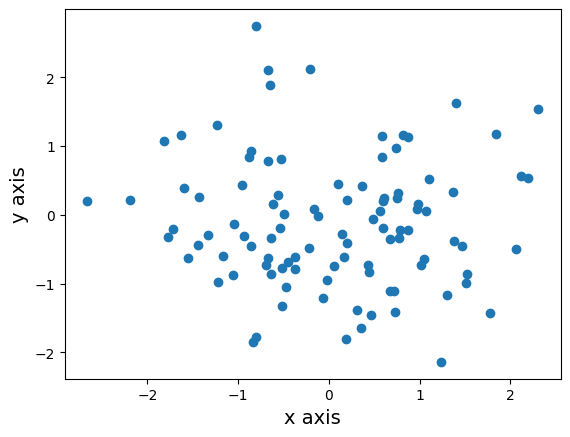

In [21]:
# draw a random sample from a Gaussian distribution for x and y
x_data = np.random.normal(loc=0, scale=1, size=100)
y_data = np.random.normal(loc=0, scale=1, size=100)

plt.scatter(x_data, y_data)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can set the sizes, colors, and shapes of the points to add even more information.

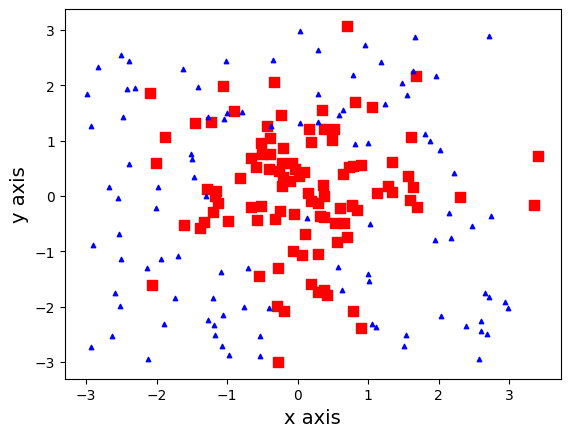

In [27]:
# draw a random sample from a Gaussian distribution for x and y
x_data1 = np.random.normal(loc=0, scale=1, size=100)
y_data1 = np.random.normal(loc=0, scale=1, size=100)

# draw a random sample from a uniform distribution for x and y
x_data2 = np.random.uniform(low=-3, high=3, size=100)
y_data2 = np.random.uniform(low=-3, high=3, size=100)

plt.scatter(x_data1, y_data1, s=50, c="red", marker="s")
plt.scatter(x_data2, y_data2, s=10, c="blue", marker="^")

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can also have the points of a given data set change in size or color based on another array of values. For example, we will plot a linear set of points but have them grow in size like x$^3$ We will also have them change in color based on the x value.

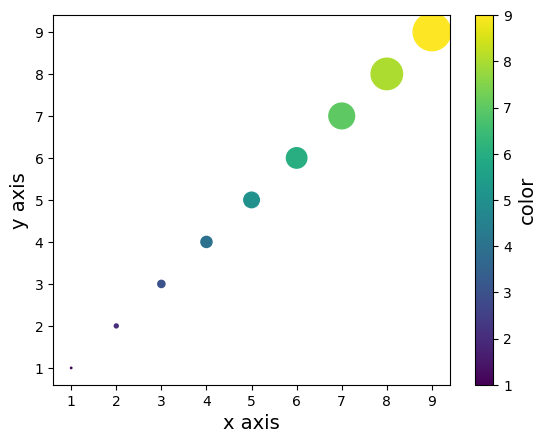

In [40]:
x_data = np.arange(1,10)
y_data = np.arange(1,10)
size_data = x_data**3

plt.scatter(x_data, y_data, s=size_data, c=x_data, marker="o")

# we can add a colorbar to display what the colors mean
plt.colorbar().set_label(label="color", fontsize=14)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

#### Plotting a histogram

Histograms are useful to displaying how data is distributed. Let's start by plotting a basic Gaussian distribution.

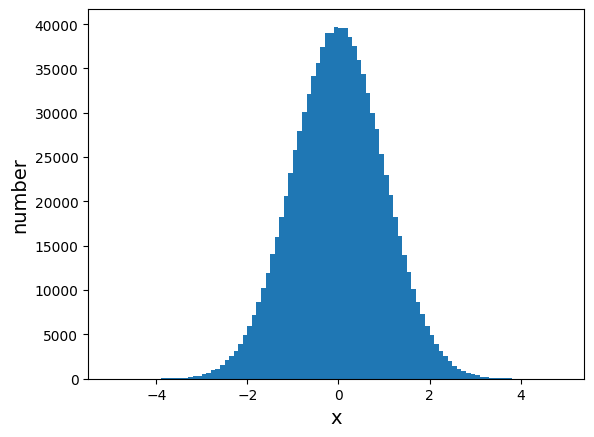

In [75]:
# draw samples from a Gaussian distribution (i.e., a bell curve)
data = np.random.normal(loc=0, scale=1, size=1000000) # loc is the mean and scale is the standard deviation of the distribution

plt.hist(data, bins=np.arange(-5,5,0.1))

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Using NumPy, we can determine the locations of the 68th, 95th, and 99.7th percentiles (i.e., $1 \sigma$, $2 \sigma$, and $3 \sigma$ from the mean). Let's do that and plot them on top of the distribution.

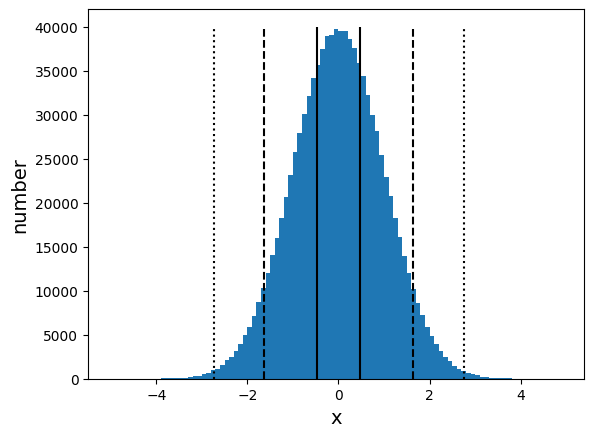

In [76]:
onesig = np.percentile(data, q=[32, 68])
twosig = np.percentile(data, q=[5, 95])
threesig = np.percentile(data, q=[0.3, 99.7])

plt.hist(data, bins=np.arange(-5,5,0.1))
plt.vlines(x=onesig, ymin=0, ymax=40000, color="k", linestyle="-")
plt.vlines(x=twosig, ymin=0, ymax=40000, color="k", linestyle="--")
plt.vlines(x=threesig, ymin=0, ymax=40000, color="k", linestyle=":")

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Lastly, let's plot the probability distribution function (PDF) and cumulative distribution function (CDF) of the Gaussian distribution above. This concept will come up again in future sessions.

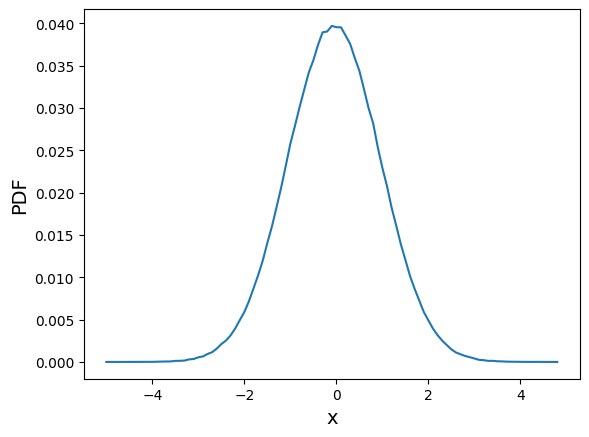

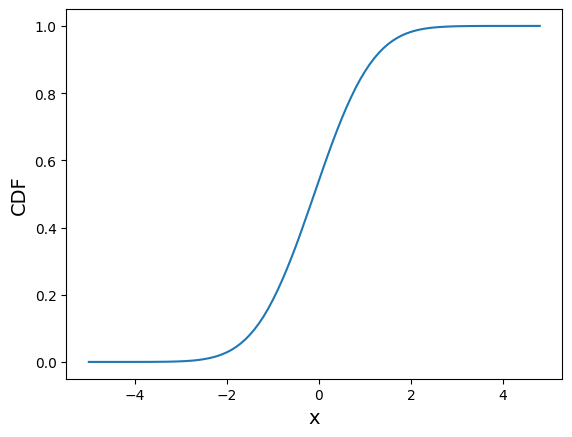

In [82]:
counts, hist_bins = np.histogram(data, bins=np.arange(-5,5,0.1))
PDF = counts/np.sum(counts)
CDF = np.cumsum(PDF)

plt.plot(hist_bins[:-1], PDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.show()


plt.plot(hist_bins[:-1], CDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.show()

#### Plotting multi-panel figures

We can make a multi-panel figure using the .subplots() function. In the following example, we will make a 2x2 figure (4 plots in total).

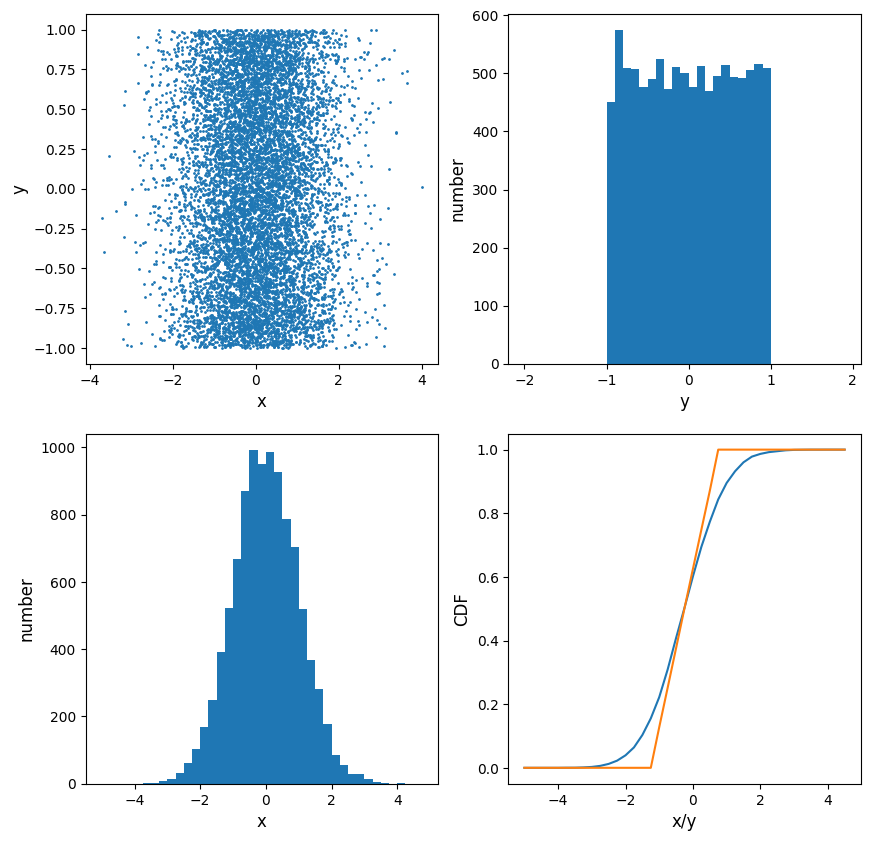

In [101]:
# first, define some data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.uniform(low=-1, high=1, size=10000)

# first, define the figure and the number of rows/columns
fig, ax = plt.subplots(2, 2, figsize=(10,10))

# plot a scatterplot of the data in the first panel (index 0,0)
ax[0,0].scatter(x_data, y_data, s=1)
ax[0,0].set_xlabel("x", fontsize=12)
ax[0,0].set_ylabel("y", fontsize=12)

# in the second panel, plot of histogram of the y data (index 0,1)
ax[0,1].hist(y_data, bins=np.arange(-2,2,0.1))
ax[0,1].set_xlabel("y", fontsize=12)
ax[0,1].set_ylabel("number", fontsize=12)

# in the third panel, plot of histogram of the x data (index 1,0)
ax[1,0].hist(x_data, bins=np.arange(-5,5,0.25))
ax[1,0].set_xlabel("x", fontsize=12)
ax[1,0].set_ylabel("number", fontsize=12)

# in the fourth panel, plot the CDFs of the x and y data together (index 1,1)
x_count, x_hist_bins = np.histogram(x_data, bins=np.arange(-5,5,0.25))
x_CDF = np.cumsum(x_count/np.sum(x_count))
y_count, y_hist_bins = np.histogram(y_data, bins=np.arange(-5,5,0.25))
y_CDF = np.cumsum(y_count/np.sum(y_count))
ax[1,1].plot(x_hist_bins[:-1], x_CDF)
ax[1,1].plot(y_hist_bins[:-1], y_CDF)
ax[1,1].set_xlabel("x/y", fontsize=12)
ax[1,1].set_ylabel("CDF", fontsize=12)

plt.show()

#### Plotting in 3D

Plotting in 3D comes in handy when, well, our data has 3 dimension! Let's see an example of how it's done (we'll use this later in the notebook). More examples can be found here: https://matplotlib.org/stable/gallery/mplot3d/index.html

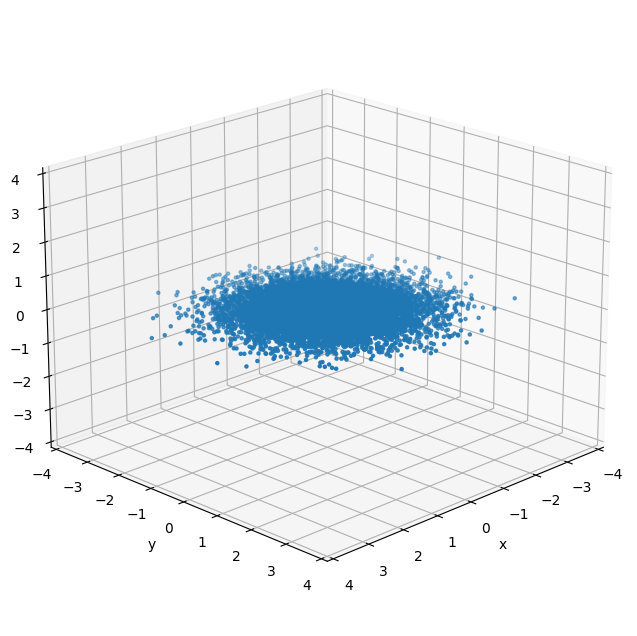

In [122]:
# define some 3D data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.normal(loc=0, scale=1, size=10000)
z_data = np.random.normal(loc=0, scale=0.1, size=10000)

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(x_data, y_data, z_data, marker=".")

# set the viewing angle with the following
ax.view_init(azim=45, elev=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])

plt.show()

# Pandas

Next, we'll do a brief crash course of Pandas, a Python databasing and data analysis library. More details on Pandas can be found here: https://pandas.pydata.org/docs/user_guide/10min.html

The most important feature of Pandas as the DataFrame object. DataFrames allow us to easily store, access, and manipulate data in large tables. Let's make a DataFrame and see how we work with it.

In [123]:
import pandas as pd

In [132]:
# dictionaries can be saved as DataFrames
# let's make a dictionary containing the ages, heights, and favorite numbers of 100 people
this_dict = {"age": np.random.uniform(low=21, high=81, size=100),
             "height": np.random.normal(loc=180, scale=10, size=100),
             "fave_number": np.random.randint(low=0, high=10, size=100)}

# now convert it to a DataFrame with Pandas
df = pd.DataFrame(this_dict)

# let's see how it looks
df

,age,height,fave_number
0,74.807320,159.919123,9
1,78.586933,172.810628,6
2,57.847729,176.569161,3
3,51.992518,179.697987,8
4,38.546680,178.148446,1
...,...,...,...
95,68.897639,166.190093,3
96,69.314750,181.915478,0
97,32.471460,165.497847,6
98,27.277774,178.740308,3


You can access specific columns as numpy arrays like so

In [133]:
ages = df["age"].values
heights = df["height"].values
fave_numbers = df["fave_number"].values

print(ages)

[74.80732014 78.58693288 57.84772866 51.99251834 38.54667962 69.44417548
 61.95756244 48.42011229 55.837237   28.40530762 46.87689477 44.96879096
 76.84876475 66.9857011  44.51358728 21.0561313  48.71617274 22.79546728
 54.88079784 58.15303091 22.53204502 36.34700768 65.66314603 49.19717327
 53.65719064 44.43925596 25.35981953 67.69900002 46.7737108  58.43318583
 51.00538048 24.61758655 67.97403197 39.59927735 34.98845648 74.65064428
 78.96285549 75.5289851  49.11346586 55.05960224 62.90855324 59.59943589
 49.90620843 44.31380409 69.87996376 53.35451473 58.78321922 48.20353749
 35.767499   68.61575558 28.29796785 23.29663609 52.82294693 61.72821539
 78.95200534 24.43266135 36.73868835 35.90571201 75.83337938 44.33663302
 68.4393523  69.33507234 74.3231166  69.24265448 53.20999338 76.17938845
 23.73169904 55.52583225 41.74648733 77.87073764 23.63656412 25.38230035
 49.32446085 79.6353832  52.55627466 23.97436411 37.09686396 73.47828275
 68.74054409 75.34087056 41.73017485 76.8870661  53

You can return the data for a specific row using .loc

In [134]:
this_person = df.iloc[10] # row 10
this_person

age             46.876895
height         182.573848
fave_number      4.000000
Name: 10, dtype: float64

You can filter data using normal boolean masking methods. Let's say we want a new DataFrame only containing people older than 50 years.

In [135]:
df2 = df[df["age"].values > 50]
df2

,age,height,fave_number
0,74.807320,159.919123,9
1,78.586933,172.810628,6
2,57.847729,176.569161,3
3,51.992518,179.697987,8
5,69.444175,179.221170,2
6,61.957562,191.181232,3
8,55.837237,198.029590,7
12,76.848765,197.172413,0
13,66.985701,181.173158,9
18,54.880798,189.756717,5


You can return some basic statistics from the dataframe using the .describe() method.

In [130]:
df.describe()

,age,height,fave_number
count,100.000000,100.000000,100.000000
mean,49.001108,181.523261,4.605527
std,15.870370,8.687325,2.744136
min,21.067941,158.417822,0.000654
25%,34.074777,176.482797,2.222531
50%,51.116662,181.200817,4.497599
75%,60.670222,187.494692,6.707560
max,79.379954,200.327391,9.784853


We're going to stop there in the interest of time, but know that there is much more that can be done with Pandas! If you want to become a data scientists, Pandas proficiency will be essential during the interview process.

# Exercise

Now let's put it all together. In this exercise, we're going to query data from Gaia to identify and plot the Hyades cluster - a 625 million-year-old open stellar cluster approximately 150 lightyears away from the Solar System. Gaia is a European Space Agency mission that is measuring the 3D locations, motions, and properties of over one billion (!) stars in the Milky Way galaxy -- essentially creating the most accurate map of our galaxy ever created. This mission has enabled countless of new studies and discoveries, with many more to come in the next decade. If you want to learn more about Gaia, here is a good summary video from the PBS Space Time YouTube channel: https://www.youtube.com/watch?v=Jdy09y0A4t0

First, we need to import the data ("Gaia_Hyades.csv") from the GitHub repo to the Colab notebook. To do this, download the csv, click on the "Files" icon on the left (looks like a folder), and upload the file by pressing the button with the upward-facing arrow.

This file contains the coordinates, parallaxes (which can be converted to distance), and proper motions (motions on the plane of the sky) for the 2000 brightest stars within 10 degrees of the center of Hyades (Right Ascension = 67.447 degrees, Declination = 16.948 degrees). The file was retrieved on this website: https://gea.esac.esa.int/archive/ (give it a try for yourself, if you want).

Let's read in the csv file using Pandas and take a look at the DataFrame.

In [168]:
df = pd.read_csv("Gaia_Hyades.csv")
df

,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,phot_bp_mean_mag,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,Gaia DR3 3412089974640037248,3412089974640037248,74.955016,21.409708,NaN,NaN,NaN,NaN,20.994678,21.329708,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gaia DR3 3293789120559934464,3293789120559934464,68.971907,10.373991,0.567286,-0.896548,-1.376194,0.996367,20.004692,20.581213,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gaia DR3 3293984004701216512,3293984004701216512,70.707178,10.467411,0.653334,6.995468,-4.714438,0.988608,19.487300,20.268192,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gaia DR3 3294036815618551552,3294036815618551552,70.543389,10.626719,0.058983,0.718837,0.260744,0.975939,19.445276,19.913368,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gaia DR3 3295661240969455744,3295661240969455744,72.677641,11.696876,0.525764,-0.405029,-1.773447,0.981141,20.185942,20.750870,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Gaia DR3 3293801485770432768,3293801485770432768,69.028664,10.549582,0.123181,0.517813,-0.179604,1.018307,18.170946,18.618626,...,False,True,True,5161.367,4.8036,-3.1846,1742.6655,0.2491,0.2018,0.1112
1996,Gaia DR3 3293801485770432896,3293801485770432896,69.034856,10.550832,0.231747,-0.964071,-1.631971,0.993272,17.131773,17.359072,...,False,True,True,8879.160,4.3965,-0.3691,5871.0930,1.0668,0.9707,0.5197
1997,Gaia DR3 3293801490066040960,3293801490066040960,69.038124,10.559032,NaN,NaN,NaN,NaN,21.054253,20.266594,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,Gaia DR3 3293801490066041472,3293801490066041472,69.037564,10.544294,NaN,NaN,NaN,NaN,21.185009,22.330788,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can list the column names like so

In [169]:
list(df)

['designation',
 'source_id',
 'ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'ruwe',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'radial_velocity',
 'phot_variable_flag',
 'non_single_star',
 'has_xp_continuous',
 'has_xp_sampled',
 'has_rvs',
 'has_epoch_photometry',
 'has_epoch_rv',
 'has_mcmc_gspphot',
 'has_mcmc_msc',
 'teff_gspphot',
 'logg_gspphot',
 'mh_gspphot',
 'distance_gspphot',
 'azero_gspphot',
 'ag_gspphot',
 'ebpminrp_gspphot']

Here is a brief description of the columns we care about:
- designation: The source ID of the star and the data release (DR) the data corresponds to.
- source_id: The identified of the star in the Gaia catalogue.
- ra: The right ascention of the star (in degrees).
- dec: The declination of the star (in degrees).
- parallax: The parallax of the star (1/parallax is distance in parsecs).
- pmra: The proper motion of the star in the RA direction (in milli-arcseconds per year).
- pmdec: The proper motion of the star in the Dec direction (in milli-arcseconds per year).
- phot_g_mean_mag: The apparent G magnitude of the star (i.e., the apparent brightness of the star as measured using the G filter).
- phot_bp_mean_mag: The apparent BP magnitude of the star.
- phot_rp_mean_mag: The apparent RP magnitude of the star.
- teff_gspphot: The estimated surface temperature of the star (in Kelvin).
- logg_gspphot: The estimated log surface gravity (in cm/s^2) of the star.

Let's start by pruning the dataframe to get rid of stars that don't have coordinates, proper motions, parallaxes, or teff/logg estimates.

In [170]:
df = df.dropna(subset=["ra", "dec", "pmra", "pmdec", "parallax", "teff_gspphot", "logg_gspphot"])
df

,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,phot_bp_mean_mag,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
20,Gaia DR3 3293761357892677376,3293761357892677376,68.865866,10.165108,0.872570,5.104865,-1.507910,1.043107,15.875954,16.421076,...,False,True,True,4829.3100,4.3220,-1.0026,1017.1511,0.3777,0.2972,0.1599
22,Gaia DR3 3293761456675860608,3293761456675860608,68.859104,10.189214,0.451423,2.382196,-3.268085,1.003105,18.437004,19.048012,...,False,True,False,4305.2764,4.9397,-1.6048,994.9938,0.0353,0.0268,0.0144
23,Gaia DR3 3293761460971890176,3293761460971890176,68.859262,10.192725,0.690504,7.607807,-7.984136,0.986927,16.367147,16.901590,...,False,True,True,5057.3440,4.3995,-0.7365,1253.9829,0.5473,0.4353,0.2353
24,Gaia DR3 3293761491035733248,3293761491035733248,68.877599,10.188130,1.135087,2.743487,10.554003,0.965727,17.939472,18.895160,...,False,True,True,3814.2590,4.8599,-1.0278,473.0829,0.6516,0.4595,0.2487
25,Gaia DR3 3293761491035734528,3293761491035734528,68.890949,10.193718,0.140098,0.796748,-0.254791,1.013341,18.226858,18.722136,...,False,True,True,4870.9960,4.8673,-2.1276,1476.3861,0.0258,0.0204,0.0111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,Gaia DR3 3293801249548853504,3293801249548853504,69.116485,10.582468,0.696040,5.513308,-2.099147,0.982753,17.882696,18.622084,...,False,True,True,4146.3755,4.8627,-1.1397,769.8273,0.1487,0.1103,0.0591
1988,Gaia DR3 3293801313971745920,3293801313971745920,69.112325,10.589407,0.680263,4.227734,1.358546,1.064232,18.071530,18.742743,...,False,True,True,4248.3130,4.6265,-2.1275,888.9134,0.1633,0.1231,0.0666
1993,Gaia DR3 3293801451410703104,3293801451410703104,69.122958,10.610001,0.321168,1.700039,-2.387751,1.015355,18.325623,18.974186,...,False,True,False,4338.6640,4.9057,-1.4853,1013.8286,0.1325,0.1005,0.0541
1995,Gaia DR3 3293801485770432768,3293801485770432768,69.028664,10.549582,0.123181,0.517813,-0.179604,1.018307,18.170946,18.618626,...,False,True,True,5161.3670,4.8036,-3.1846,1742.6655,0.2491,0.2018,0.1112


#### Task 1: Removing unassociated stars.

Hyades only contains about 500 stars, but our DataFrame above has over 700. This means there are likely some stars in the DataFrame that are no actually members of the Hyades cluster. Using histograms, locate and remove stars that are unlikely to actually be Hyades members. Note that all stars in the cluster should have roughly the same proper motions.

Try it yourself first, then "unhide" the cells below to reveal the solution.

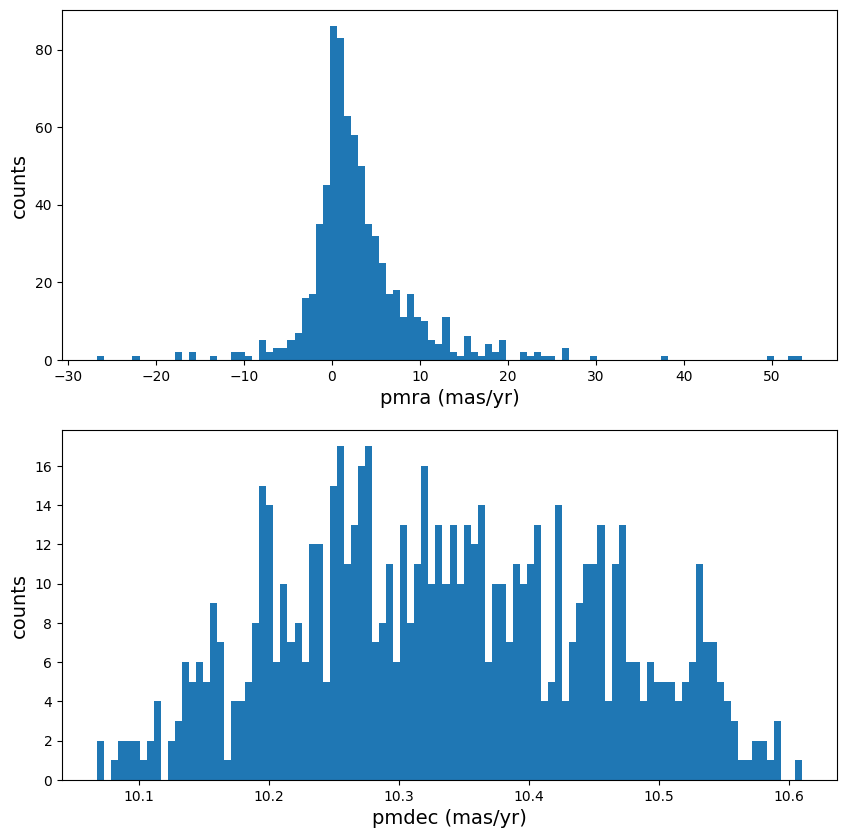

In [171]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].hist(pmra_data, bins=100)
ax[0].set_xlabel("pmra (mas/yr)", fontsize=14)
ax[0].set_ylabel("counts", fontsize=14)

ax[1].hist(dec_data, bins=100)
ax[1].set_xlabel("pmdec (mas/yr)", fontsize=14)
ax[1].set_ylabel("counts", fontsize=14)

plt.show()

It looks like there are some outliers in the pmra plot. Let's remove everything more than $3 \sigma$ from the mean of both pmra and pmdec.

In [172]:
twosig_ra = np.percentile(pmra_data, q=[0.3, 99.7])
twosig_dec = np.percentile(pmdec_data, q=[0.3, 99.7])
df = df[
    (df["pmra"].values > twosig_ra[0]) & (df["pmra"].values < twosig_ra[1]) &
    (df["pmra"].values > twosig_dec[0]) & (df["pmra"].values < twosig_dec[1])
    ]
df

,designation,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,phot_bp_mean_mag,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
20,Gaia DR3 3293761357892677376,3293761357892677376,68.865866,10.165108,0.872570,5.104865,-1.507910,1.043107,15.875954,16.421076,...,False,True,True,4829.3100,4.3220,-1.0026,1017.1511,0.3777,0.2972,0.1599
22,Gaia DR3 3293761456675860608,3293761456675860608,68.859104,10.189214,0.451423,2.382196,-3.268085,1.003105,18.437004,19.048012,...,False,True,False,4305.2764,4.9397,-1.6048,994.9938,0.0353,0.0268,0.0144
23,Gaia DR3 3293761460971890176,3293761460971890176,68.859262,10.192725,0.690504,7.607807,-7.984136,0.986927,16.367147,16.901590,...,False,True,True,5057.3440,4.3995,-0.7365,1253.9829,0.5473,0.4353,0.2353
24,Gaia DR3 3293761491035733248,3293761491035733248,68.877599,10.188130,1.135087,2.743487,10.554003,0.965727,17.939472,18.895160,...,False,True,True,3814.2590,4.8599,-1.0278,473.0829,0.6516,0.4595,0.2487
25,Gaia DR3 3293761491035734528,3293761491035734528,68.890949,10.193718,0.140098,0.796748,-0.254791,1.013341,18.226858,18.722136,...,False,True,True,4870.9960,4.8673,-2.1276,1476.3861,0.0258,0.0204,0.0111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,Gaia DR3 3293801249548853504,3293801249548853504,69.116485,10.582468,0.696040,5.513308,-2.099147,0.982753,17.882696,18.622084,...,False,True,True,4146.3755,4.8627,-1.1397,769.8273,0.1487,0.1103,0.0591
1988,Gaia DR3 3293801313971745920,3293801313971745920,69.112325,10.589407,0.680263,4.227734,1.358546,1.064232,18.071530,18.742743,...,False,True,True,4248.3130,4.6265,-2.1275,888.9134,0.1633,0.1231,0.0666
1993,Gaia DR3 3293801451410703104,3293801451410703104,69.122958,10.610001,0.321168,1.700039,-2.387751,1.015355,18.325623,18.974186,...,False,True,False,4338.6640,4.9057,-1.4853,1013.8286,0.1325,0.1005,0.0541
1995,Gaia DR3 3293801485770432768,3293801485770432768,69.028664,10.549582,0.123181,0.517813,-0.179604,1.018307,18.170946,18.618626,...,False,True,True,5161.3670,4.8036,-3.1846,1742.6655,0.2491,0.2018,0.1112


Looks like we got rid of a few dozen stars that are unlikely to be members. Let's replot the distribution and see how they look.

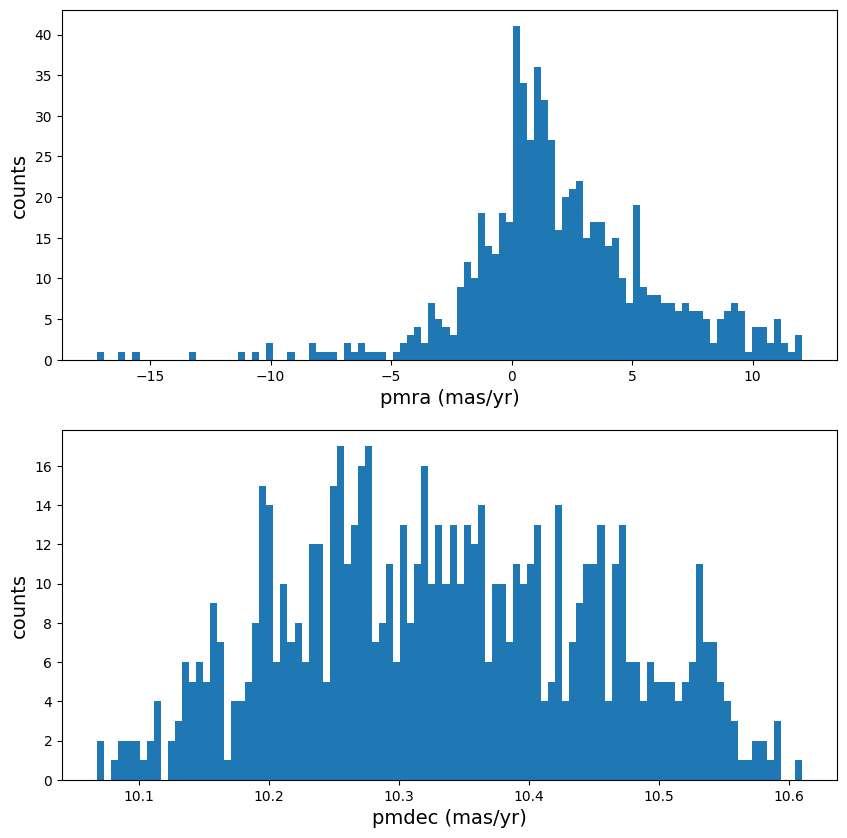

In [173]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].hist(pmra_data, bins=100)
ax[0].set_xlabel("pmra (mas/yr)", fontsize=14)
ax[0].set_ylabel("counts", fontsize=14)

ax[1].hist(dec_data, bins=100)
ax[1].set_xlabel("pmdec (mas/yr)", fontsize=14)
ax[1].set_ylabel("counts", fontsize=14)

plt.show()

#### Task 2: Plotting the color-magnitude diagram.

Color-magnitude diagrams are used to calculate the ages and average metallicities of stellar clusters (by comparing against stellar evolution models). Make a scatter plot with the following: BP-RP on the x axis and M_g on the y axis. Color the points according to teff_gspphot. What does the plot look like? We'll discuss the answer together afterwards.

Note that M_G is the absolute magnitude of the star in the G filter. This is calculated using the following equation:

M_G = G + 5 + 5*log10(parallax/1000)

<ipython-input-189-526bd8a7e0fa>:3: RuntimeWarning: invalid value encountered in log10
  M_G = G_data + 5 + 5*np.log10(parallax/1000)


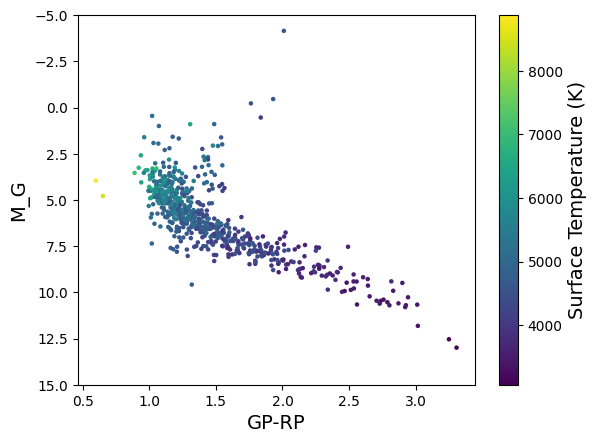

In [189]:
G_data = df["phot_g_mean_mag"].values
parallax = df["parallax"].values
M_G = G_data + 5 + 5*np.log10(parallax/1000)
BP_data = df["phot_bp_mean_mag"].values
RP_data = df["phot_rp_mean_mag"].values
teff_data = df["teff_gspphot"].values

plt.scatter(BP_data-RP_data, M_G, c=teff_data, s=5)
plt.colorbar().set_label(label="Surface Temperature (K)", fontsize=14)

plt.xlabel("GP-RP", fontsize=14)
plt.ylabel("M_G", fontsize=14)

plt.ylim([15,-5])
plt.show()

#### Task 3: Plotting the cluster in 3D space.

Lastly, let's plot the cluster in 3D using the RA, Dec, and distances from the DataFrame. Let's again color them by surface temperature.

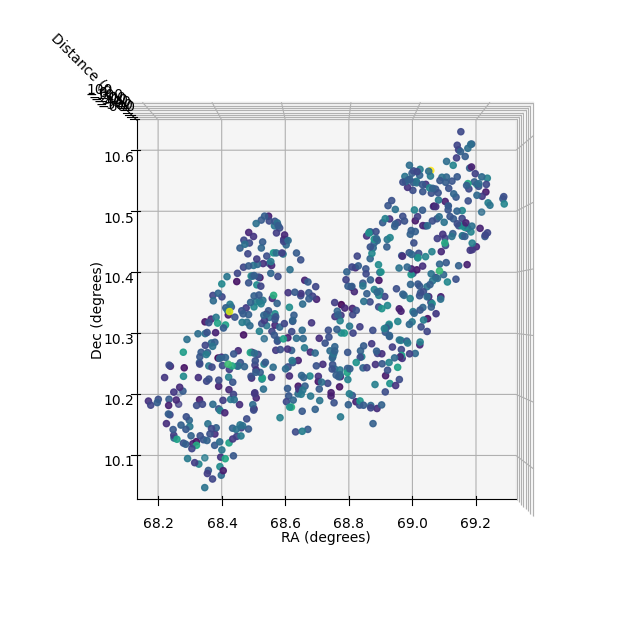

In [207]:
ra_data = df["ra"].values
dec_data = df["dec"].values
distance_data = 1/df["parallax"].values

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(ra_data, dec_data, distance_data, c=teff_data)

# set the viewing angle with the following
ax.view_init(azim=-90, elev=90)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.set_zlabel('Distance (pc)')


plt.show()